<a href="https://colab.research.google.com/github/amandakoki/AI-Coursework--2025/blob/main/CAT_2_Pokemon_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#data loading
df = pd.read_csv("Pokemon.csv")

In [ ]:
df.head(10)

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [ ]:
df.tail()

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Attack   800 non-null    int64 
 8   Sp. Defense  800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
df.dtypes

,0
SN,int64
Name,object
Type 1,object
Type 2,object
HP,int64
Attack,int64
Defense,int64
Sp. Attack,int64
Sp. Defense,int64
Speed,int64


In [ ]:
df.shape

(800, 12)

In [ ]:
#check for null values
df.isnull().sum()

,0
SN,0
Name,0
Type 1,0
Type 2,386
HP,0
Attack,0
Defense,0
Sp. Attack,0
Sp. Defense,0
Speed,0


In [ ]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Handling Missing Values :fill missing 'Type 2' with 'Not Applicable '
df['Type 2'] = df['Type 2'].fillna('N/A')

In [ ]:
df.isnull().sum()

,0
SN,0
Name,0
Type 1,0
Type 2,0
HP,0
Attack,0
Defense,0
Sp. Attack,0
Sp. Defense,0
Speed,0


In [ ]:
#Creation of Total stats column
stat_cols = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']
df['Total Stats'] = df[stat_cols].sum(axis=1)

In [ ]:
print("\nCleaned Data Head with 'Total Stats':")
print(df.head())


Cleaned Data Head with 'Total Stats':
   SN                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Attack  \
0   1              Bulbasaur  Grass  Poison  45      49       49          65   
1   2                Ivysaur  Grass  Poison  60      62       63          80   
2   3               Venusaur  Grass  Poison  80      82       83         100   
3   3  VenusaurMega Venusaur  Grass  Poison  80     100      123         122   
4   4             Charmander   Fire     N/A  39      52       43          60   

   Sp. Defense  Speed  Generation  Legendary  Total Stats  
0           65     45           1      False          318  
1           80     60           1      False          405  
2          100     80           1      False          525  
3          120     80           1      False          625  
4           50     65           1      False          309  


# Exploratory Data Analysis

**1.Distribution of Total Stats - to understand the general power level of Pokémon in the dataset.**

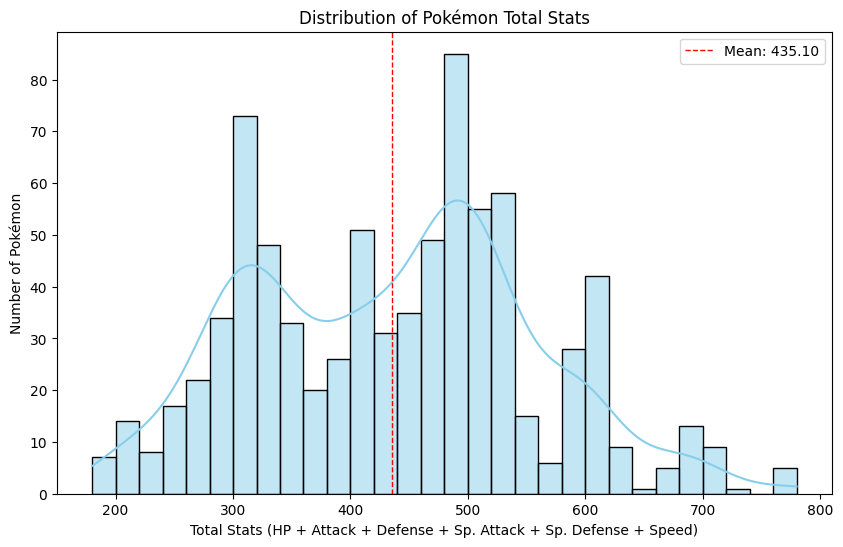


Observation 1: The mean Total Stats is 435.10. The distribution is slightly skewed to the right, indicating a few extremely powerful Pokémon pull the average up, but most Pokémon cluster in the 300-500 Total Stats range.


In [ ]:
# Insight 1: Distribution of Total Stats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Stats'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Pokémon Total Stats')
plt.xlabel('Total Stats (HP + Attack + Defense + Sp. Attack + Sp. Defense + Speed)')
plt.ylabel('Number of Pokémon')
plt.axvline(df['Total Stats'].mean(), color='red', linestyle='--', linewidth=1, label=f'Mean: {df["Total Stats"].mean():.2f}')
plt.legend()
plt.show()

# Observation 1
print(f"\nObservation 1: The mean Total Stats is {df['Total Stats'].mean():.2f}. The distribution is slightly skewed to the right, indicating a few extremely powerful Pokémon pull the average up, but most Pokémon cluster in the 300-500 Total Stats range.")

**2. Pokemon count per generation**

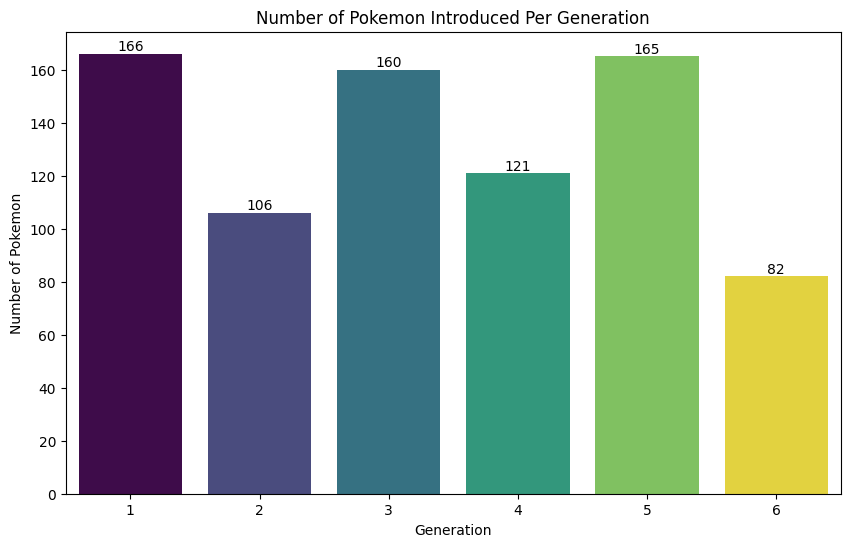


Observation 2: Generation 1 introduced the highest number of Pokemon, followed closely by Generation 5. The number of new Pokemon introduced per generation has generally decreased or stabilized since Generation 3.


In [ ]:
# Insight 2: Pokémon Count per Generation
gen_counts = df['Generation'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
# 1. Assign plot to ax_gen and set 'hue' to fix the Seaborn warning
ax_gen = sns.barplot(x=gen_counts.index, y=gen_counts.values,
                     hue=gen_counts.index, palette='viridis')
plt.title('Number of Pokemon Introduced Per Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')

if ax_gen.legend_:
    ax_gen.legend_.remove()

for container in ax_gen.containers:
    ax_gen.bar_label(container, fmt='%d')

plt.show()
print("\nObservation 2: Generation 1 introduced the highest number of Pokemon, followed closely by Generation 5. The number of new Pokemon introduced per generation has generally decreased or stabilized since Generation 3.")

**3. Most Common Primary Types ('Type 1')**

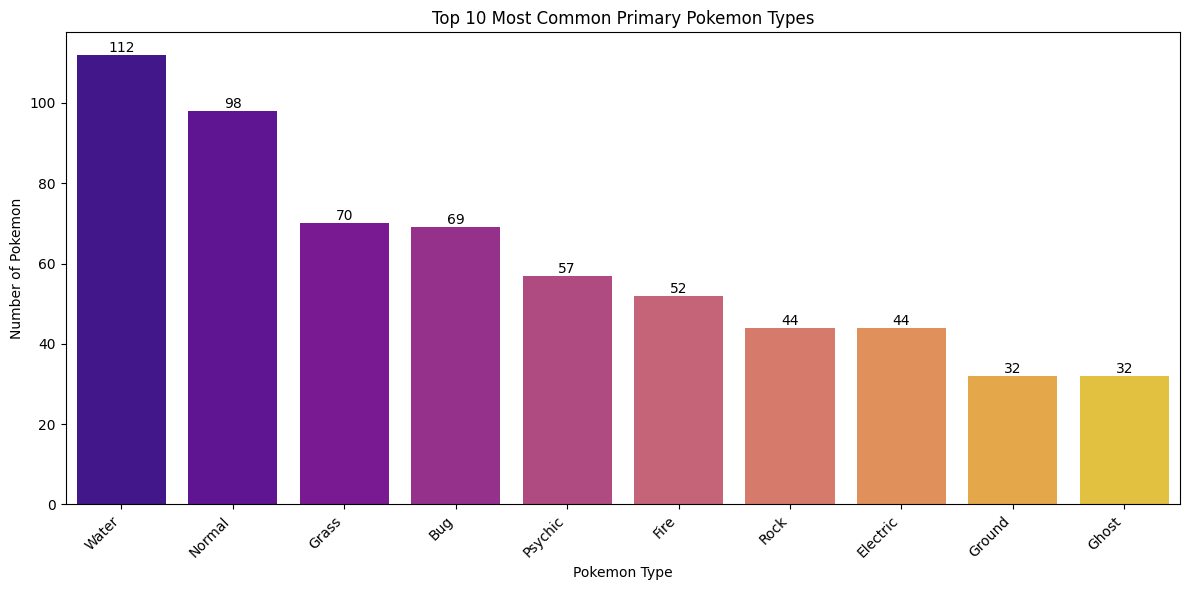


Observation 3: The 'Water' type is the most common primary type, followed by 'Normal' and 'Grass'. This suggests a high representation of aquatic and standard-type creatures in the Pokemon world.


In [ ]:
# Insight 3: Most Common Primary Types
type_counts = df['Type 1'].value_counts().head(10) # Top 10 types

plt.figure(figsize=(12, 6))
ax_type = sns.barplot(x=type_counts.index, y=type_counts.values,
                      hue=type_counts.index, palette='plasma')
plt.title('Top 10 Most Common Primary Pokemon Types')
plt.xlabel('Pokemon Type')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=45, ha='right')

# Use the logic you confirmed to safely remove the redundant legend
if ax_type.legend_:
    ax_type.legend_.remove()

# Added Data Labels for clarity
for container in ax_type.containers:
    ax_type.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()
print(f"\nObservation 3: The 'Water' type is the most common primary type, followed by 'Normal' and 'Grass'. This suggests a high representation of aquatic and standard-type creatures in the Pokemon world.")

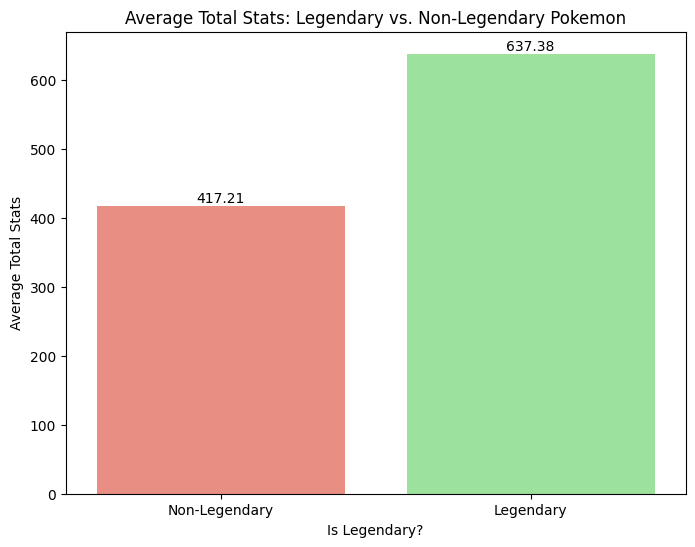


Observation 4: Legendary Pokemon have a significantly higher average Total Stats (637.38) compared to Non-Legendary Pokemon (417.21).


In [ ]:
# Insight 4: Legendary vs. Non-Legendary Total Stats Comparison
legendary_stats = df.groupby('Legendary')['Total Stats'].mean().reset_index()

plt.figure(figsize=(8, 6))
# FIX: Assign 'Legendary' to 'hue' to satisfy the new Seaborn requirement
ax_legendary = sns.barplot(x='Legendary', y='Total Stats', data=legendary_stats,
                           hue='Legendary', palette=['salmon', 'lightgreen'])
plt.title('Average Total Stats: Legendary vs. Non-Legendary Pokemon')
plt.xlabel('Is Legendary?')
plt.ylabel('Average Total Stats')
plt.xticks([0, 1], ['Non-Legendary', 'Legendary'])

if ax_legendary.legend_:
    ax_legendary.legend_.remove()

# Add Data Labels
for container in ax_legendary.containers:
    ax_legendary.bar_label(container, fmt='%.2f')
plt.show()

# Observation 4 (reiterated with accurate stats)
avg_legendary = legendary_stats[legendary_stats['Legendary'] == True]['Total Stats'].iloc[0]
avg_non_legendary = legendary_stats[legendary_stats['Legendary'] == False]['Total Stats'].iloc[0]

print(f"\nObservation 4: Legendary Pokemon have a significantly higher average Total Stats ({avg_legendary:.2f}) compared to Non-Legendary Pokemon ({avg_non_legendary:.2f}).")

# Model based on the k-Nearest Neighbours algorithm

Please upload the 'pokemon.csv' file:


Saving Pokemon.csv to Pokemon (1).csv


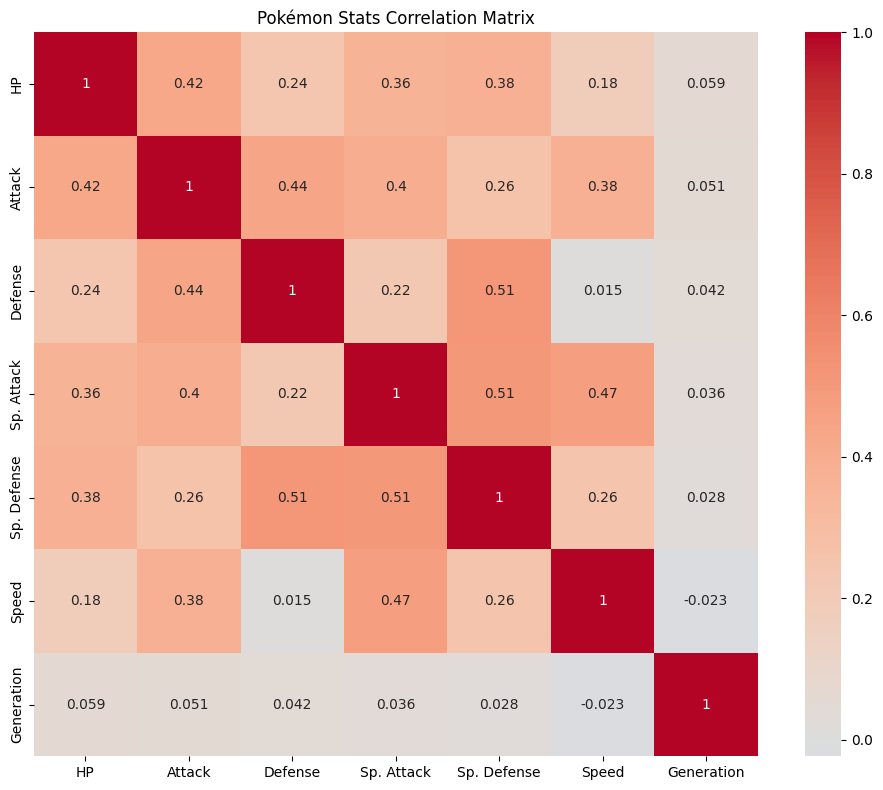

Correlation Matrix:
                   HP    Attack   Defense  Sp. Attack  Sp. Defense     Speed  \
HP           1.000000  0.422386  0.239622    0.362380     0.378718  0.175952   
Attack       0.422386  1.000000  0.438687    0.396362     0.263990  0.381240   
Defense      0.239622  0.438687  1.000000    0.223549     0.510747  0.015227   
Sp. Attack   0.362380  0.396362  0.223549    1.000000     0.506121  0.473018   
Sp. Defense  0.378718  0.263990  0.510747    0.506121     1.000000  0.259133   
Speed        0.175952  0.381240  0.015227    0.473018     0.259133  1.000000   
Generation   0.058683  0.051451  0.042419    0.036437     0.028486 -0.023121   

             Generation  
HP             0.058683  
Attack         0.051451  
Defense        0.042419  
Sp. Attack     0.036437  
Sp. Defense    0.028486  
Speed         -0.023121  
Generation     1.000000  


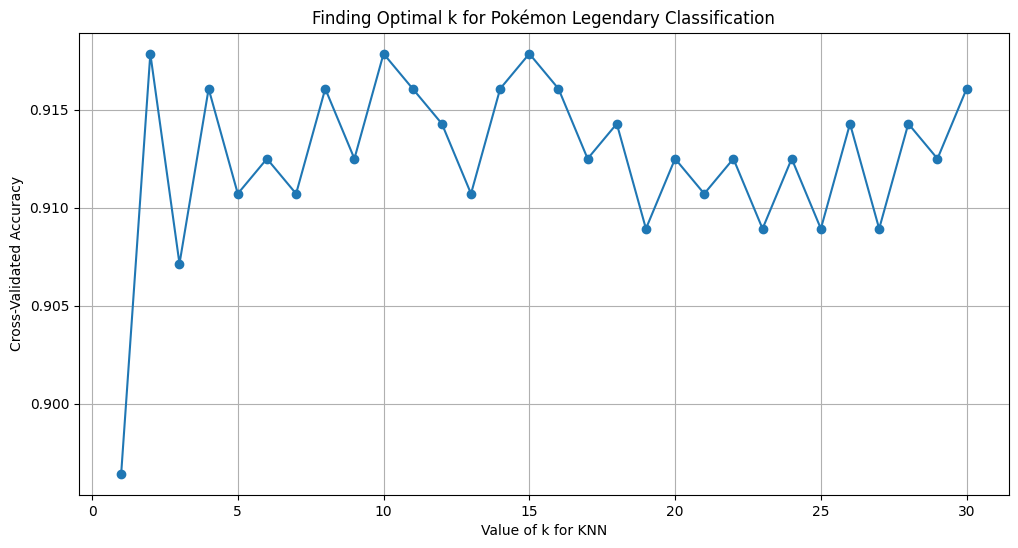

Optimal k: 2
Best cross-validation accuracy: 0.9179

Test Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.96       221
        True       0.45      0.26      0.33        19

    accuracy                           0.92       240
   macro avg       0.70      0.62      0.64       240
weighted avg       0.90      0.92      0.91       240



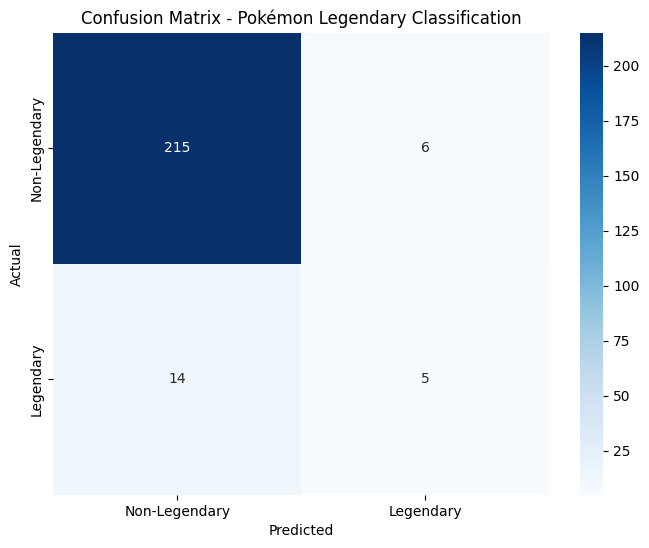

In [ ]:
#Question 3
# k-Nearest Neighbors Classification with Optimal k Verification
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset from the uploaded CSV file
print("Please upload the 'pokemon.csv' file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Select only numeric columns for correlation analysis
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Generation']
numeric_df = df[numeric_cols]

# Create correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Pokémon Stats Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

# Prepare data for classification
# Let's use Attack and Speed as features
X = df[['Attack', 'Speed']].values
y = df['Legendary'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal k value
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot k vs accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal k for Pokémon Legendary Classification')
plt.grid(True)
plt.show()

# Find the best k
optimal_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)
print(f"Optimal k: {optimal_k}")
print(f"Best cross-validation accuracy: {best_accuracy:.4f}")

# Train final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_knn.predict(X_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Non-Legendary', 'Legendary'],
           yticklabels=['Non-Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Pokémon Legendary Classification')
plt.show()

In [ ]:
# Question 4: Create an Eager Learning Classifier (SVM)
from sklearn.svm import SVC

# 1. Initialize the Support Vector Classifier (SVC)
svm_base = SVC(random_state=42)

# 2. Train (Fit) the model
svm_base.fit(X_train_scaled, y_train)

# 3. Make predictions on the test set
y_pred_svm_base = svm_base.predict(X_test_scaled)

print("SVM Base Model trained successfully.")
print("\nSVM Base Classification Report:")
print(classification_report(y_test, y_pred_svm_base))

SVM Base Model trained successfully.

SVM Base Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       221
           1       1.00      0.05      0.10        19

    accuracy                           0.93       240
   macro avg       0.96      0.53      0.53       240
weighted avg       0.93      0.93      0.89       240



In [ ]:
# Question 5: Tuned SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

print("QUESTION 5: HYPERPARAMETER TUNING (SVM)")

# 1. Define the parameter grid to search
# We include higher 'C' values and different kernels to find the best fit
param_grid = {
    'C': [1, 10, 100, 1000],        # Higher C helps separate complex data
    'gamma': [1, 0.1, 0.01, 0.001], # Controls how "curved" the boundary is
    'kernel': ['rbf', 'linear']     # Try both linear and non-linear math
}

# 2. Initialize GridSearchCV with Class Balancing
svm_model = SVC(random_state=42, class_weight='balanced')

# refit=True automatically retrains the best model found on the data
grid = GridSearchCV(svm_model, param_grid, refit=True, verbose=1)

# 3. Fit the grid search using your SCALED data from Q3
print("Tuning hyperparameters... please wait.")
grid.fit(X_train_scaled, y_train)

# 4. Print best parameters found
print(f"\nBest Parameters found: {grid.best_params_}")

# 5. Predict using the best model found (using SCALED test data)
y_pred_svm_tuned = grid.predict(X_test_scaled)

# Store the best estimator for Question 6 plotting
svm_tuned = grid.best_estimator_

# 6. Print Report
print("\nSVM Tuned Classification Report:")
print(classification_report(y_test, y_pred_svm_tuned, target_names=['Non-Legendary', 'Legendary']))

QUESTION 5: HYPERPARAMETER TUNING (SVM)
Tuning hyperparameters... please wait.
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters found: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

SVM Tuned Classification Report:
               precision    recall  f1-score   support

Non-Legendary       0.97      0.76      0.85       221
    Legendary       0.19      0.68      0.30        19

     accuracy                           0.75       240
    macro avg       0.58      0.72      0.58       240
 weighted avg       0.90      0.75      0.80       240



In [ ]:
# Question 6: Evaluation using Confusion Matrices

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load and prepare data
pokemon_df = pd.read_csv('Pokemon.csv')
features = ['Attack', 'Speed']
target = 'Legendary'

X = pokemon_df[features]
y = pokemon_df[target]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train all three models
# 1. k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# 2. Base SVM model
svm_base = SVC(random_state=42)
svm_base.fit(X_train_scaled, y_train)
y_pred_svm_base = svm_base.predict(X_test_scaled)

# 3. Tuned SVM model
svm_tuned = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
svm_tuned.fit(X_train_scaled, y_train)
y_pred_svm_tuned = svm_tuned.predict(X_test_scaled)

# Evaluate all models
models = {
    'k-NN': y_pred_knn,
    'SVM Base': y_pred_svm_base,
    'SVM Tuned': y_pred_svm_tuned
}

print("CONFUSION MATRIX METRICS:")
print("="*40)
print(f"{'Model':<10} {'Accuracy':<8} {'Precision':<9} {'Recall':<7} {'F1-Score':<8}")
print("-" * 50)

for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"{name:<10} {accuracy:.4f}   {precision:.4f}    {recall:.4f}   {f1:.4f}")
    print(f"           TN:{tn} FP:{fp} FN:{fn} TP:{tp}")

print("\nPERFORMANCE SUMMARY:")
print("="*40)
best_model = max(models.keys(), key=lambda x: accuracy_score(y_test, models[x]))
best_accuracy = accuracy_score(y_test, models[best_model])
print(f"Best Model: {best_model} (Accuracy: {best_accuracy:.4f})")

CONFUSION MATRIX METRICS:
Model      Accuracy Precision Recall  F1-Score
--------------------------------------------------
k-NN       0.9167   0.9046    0.9167   0.9094
           TN:214 FP:7 FN:13 TP:6
SVM Base   0.9250   0.9306    0.9250   0.8927
           TN:221 FP:0 FN:18 TP:1
SVM Tuned  0.9250   0.9306    0.9250   0.8927
           TN:221 FP:0 FN:18 TP:1

PERFORMANCE SUMMARY:
Best Model: SVM Base (Accuracy: 0.9250)


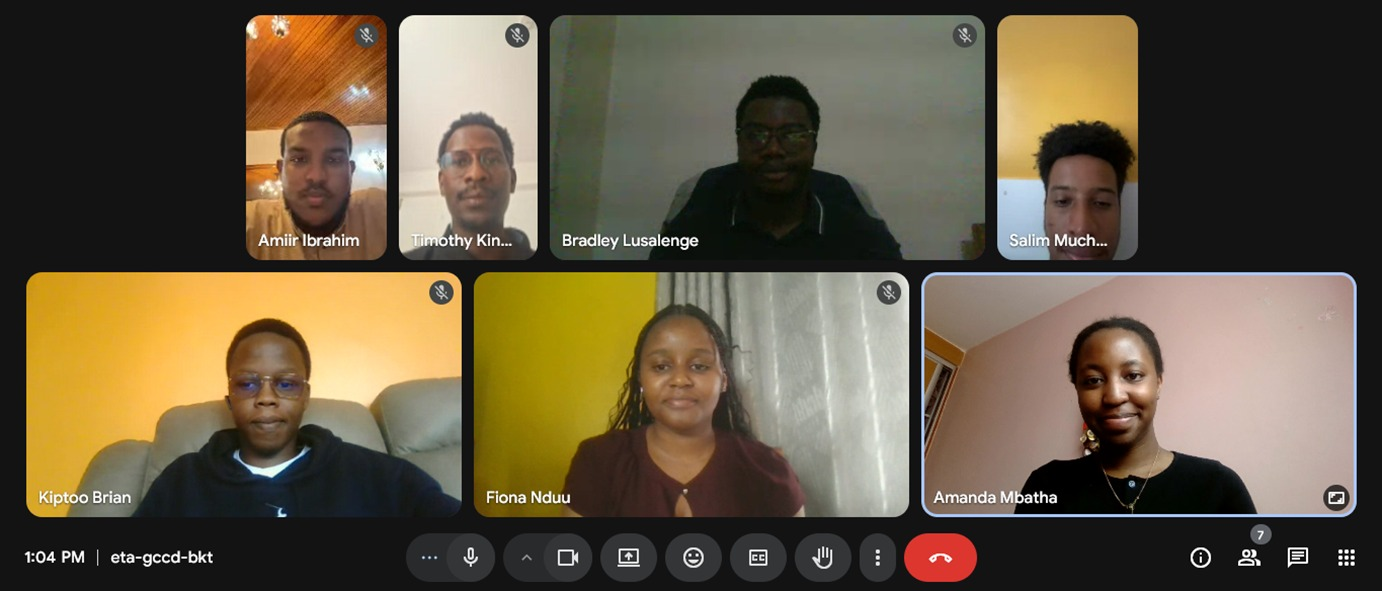